In [1]:
import sys, site
sys.path.append(site.getusersitepackages())

import nilearn
print(nilearn.__version__)


0.13.0


In [2]:
import sys
!{sys.executable} -m pip install --user brainspace


In [3]:
import sys, site
sys.path.append(site.getusersitepackages())

import brainspace
print(brainspace.__version__)


0.1.22


In [4]:
import sys
!{sys.executable} -m pip install --user neuromaps


In [5]:
import sys, site
sys.path.append(site.getusersitepackages())

import neuromaps
print(neuromaps.__version__)


0.0.5


In [6]:
import os
from numpy import load
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm
import pandas as pd
import nibabel as nib
from nilearn.plotting import view_img, plot_glass_brain, plot_anat, plot_roi
from brainspace.datasets import load_fsa5
from brainspace.plotting import plot_hemispheres
from brainspace.datasets import load_parcellation
from brainspace.utils.parcellation import map_to_labels
from neuromaps import images
from nilearn import plotting
import seaborn as sns
from scipy.spatial.distance import cdist
from brainspace.null_models.variogram import SurrogateMaps
from matplotlib.colors import ListedColormap

In [7]:
main_path = "/home/m-ehara/project/diffparc-smk"

In [8]:
data_path = main_path + "/PNI/"
results_path = main_path + "/results/diffparc/"
#fig_path = main_path + "/results/diffparc/figures/"

In [9]:
data = load(results_path + 'sub-PNC001/sub-PNC001_seed-fullBF_space-MNI152NLin6Asym_desc-Linear_schaefer400_conn_voxelwise.npz') #change the npz file name as necessary
correlation = data['conn']

In [10]:
corr_avg = np.nanmean(correlation,axis=0)
corr_avg += 1
corr_avg[np.isnan(corr_avg)] = 1

In [11]:
print("correlation shape:", np.shape(correlation))
print("corr_avg shape:", np.shape(corr_avg))
print("type:", type(correlation))

correlation shape: (599, 402)
corr_avg shape: (402,)
type: <class 'numpy.ndarray'>


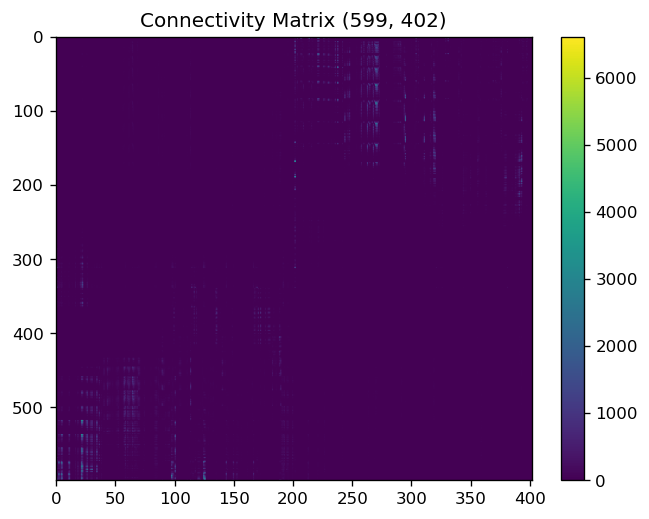

In [ ]:
import matplotlib.pyplot as plt

plt.figure(dpi=120)
plt.imshow(correlation, aspect="auto")
plt.title(f"Connectivity Matrix  (599, 400)")
plt.colorbar()
plt.show()


In [13]:
import pandas as pd
import numpy as np

s = correlation.sum(axis=0)             # (400,)
sr = np.round(s).astype(int)

sdf = pd.DataFrame({"sum": sr})
sdf


,sum
0,134429
1,312
2,39878
3,3896
4,54884
...,...
397,4950
398,500
399,276
400,1541


In [14]:
stdf=sdf.T

In [15]:
stdf.style

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401
sum,134429,312,39878,3896,54884,36333,466,3360,2820,20,23962,36484,0,2239,1723,0,12452,633,17123,1535,10833,109209,112526,900,1473,36519,66178,4692,8120,35840,43939,1357,11370,2513,68982,1391,26143,2099,9046,614,10823,1419,4627,16431,6654,5779,2193,5965,2017,185,4817,7752,13213,3142,673,3943,6872,40410,33303,8841,29473,34346,16697,10164,55080,36322,23983,11824,20473,18886,14907,2613,950,2189,5610,27,334,940,359,2282,2821,1193,1412,13331,16570,7864,10537,2762,5260,17122,7022,7155,4579,1417,5240,6319,986,32352,26705,9576,52929,1567,639,3704,7853,3561,304,1763,962,196,6837,1479,3151,31795,6075,3183,15584,3982,8990,3930,8060,3051,1397,4230,39120,40858,2168,2184,2397,470,3261,1376,3485,1433,8182,20609,960,1501,1309,3413,8874,817,3864,16465,3460,3251,247,411,6847,9017,1488,1415,5745,4408,558,727,2837,592,317,570,1229,3291,1202,300,1274,2939,13212,10584,4804,4160,12213,1620,18282,651,683,5971,6129,552,5193,12440,5287,761,12538,5309,3461,6574,2448,2340,20799,24900,11368,15136,16702,976,7510,17592,2949,129,61,12122,3105,85374,919,10738,233,9,10261,3924,10717,106,198,1,11114,12939,27,9403,5554,210,1532,470,27663,35428,133,653,1061,12718,12662,1223,1469,14393,6380,2087,5400,2056,6016,22024,188,43712,2581,832,97,12593,599,29122,1347,14461,12553,31482,1258,1024,101,92,719,4710,1025,2296,8360,39570,1927,15658,4079,3928,57495,22710,33298,2972,21633,50849,21537,78805,111562,29518,15342,1018,510,593,525,592,2470,212,115,430,462,983,4200,6057,4791,4827,10797,7262,13553,7723,1758,34332,52684,1729,959,428,870,2268,598,321,6220,13896,2533,7462,393,1865,219,7026,30881,3275,1351,285,1922,10410,6778,2099,76256,50060,2463,3426,1559,2206,669,5693,106,747,5491,64,7579,75,1623,890,47,554,340,78,428,7273,1928,7233,2516,9697,3185,4281,2774,1506,1301,4400,595,64,806,1708,1071,12607,6550,3382,4585,377,341,2060,5975,823,1349,1501,863,1053,3987,529,3137,3412,2655,3881,5296,12004,4119,5961,17323,11735,4531,1573,467,1407,2924,714,2597,11216,4084,14315,39255,15606,51613,5804,2073,941,6787,4950,500,276,1541,1020


In [16]:
n_components=100 # specify gradinet components here

In [17]:
pd.DataFrame(gm.gradients_).to_csv(results_path + f'Diff_gradients-{n_components}_seed-BASF_1p6mm.csv', index=False)

NameError: name 'gm' is not defined

In [18]:

fname = (results_path + 'Diff_gradient_{0}.nii.gz')

In [19]:
G_idx = {}
G_values = {}
for g in range(1,7):
    G_nii = nib.load(fname.format(g)).get_fdata()
    G_idx[g] = np.argwhere(G_nii)
    G_values[g] = G_nii[G_idx[g][:,0], G_idx[g][:,1], G_idx[g][:,2]].flatten()

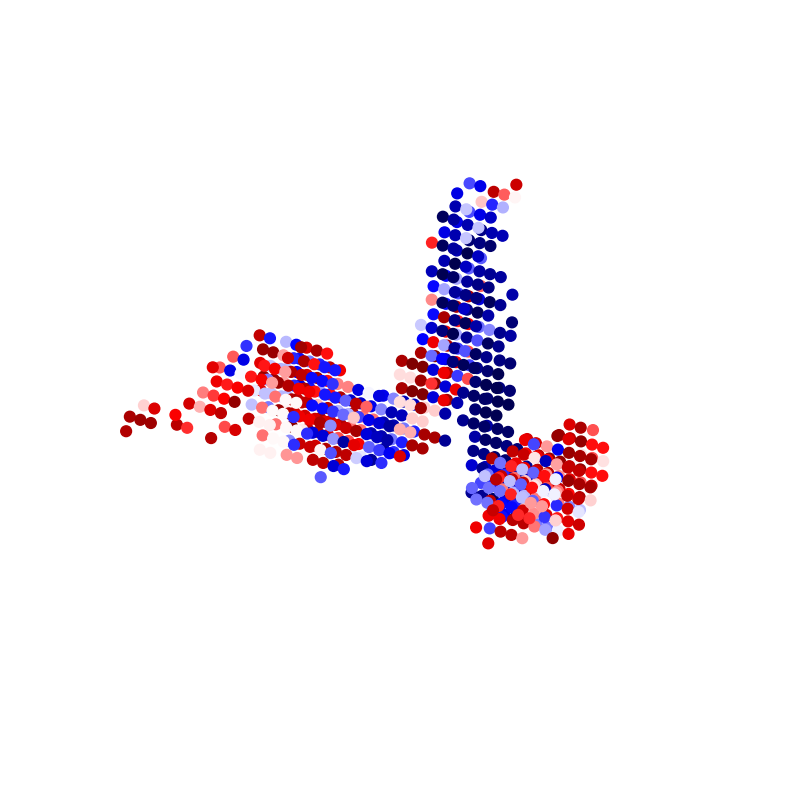

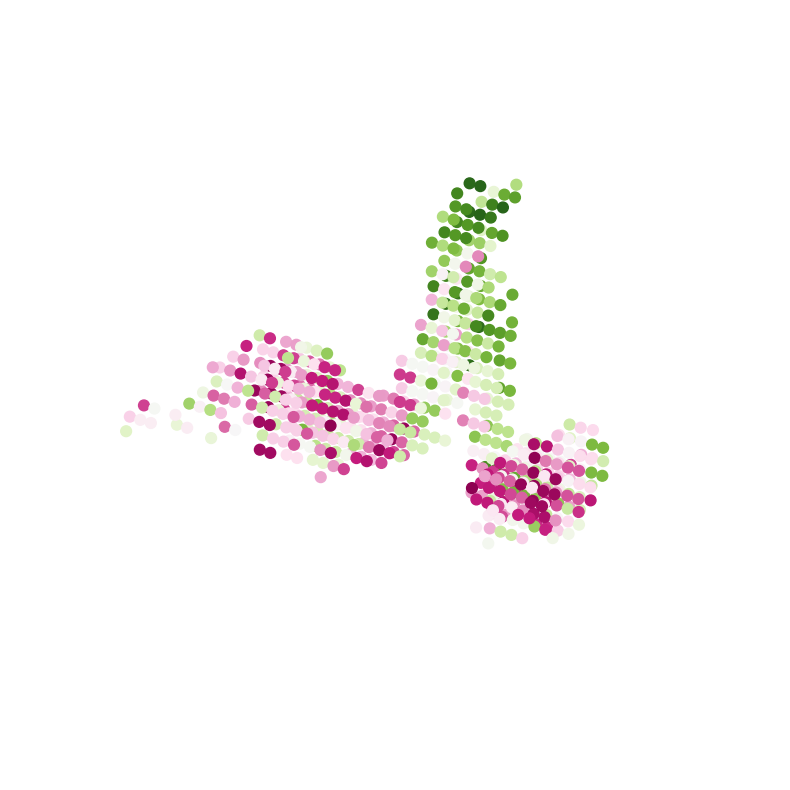

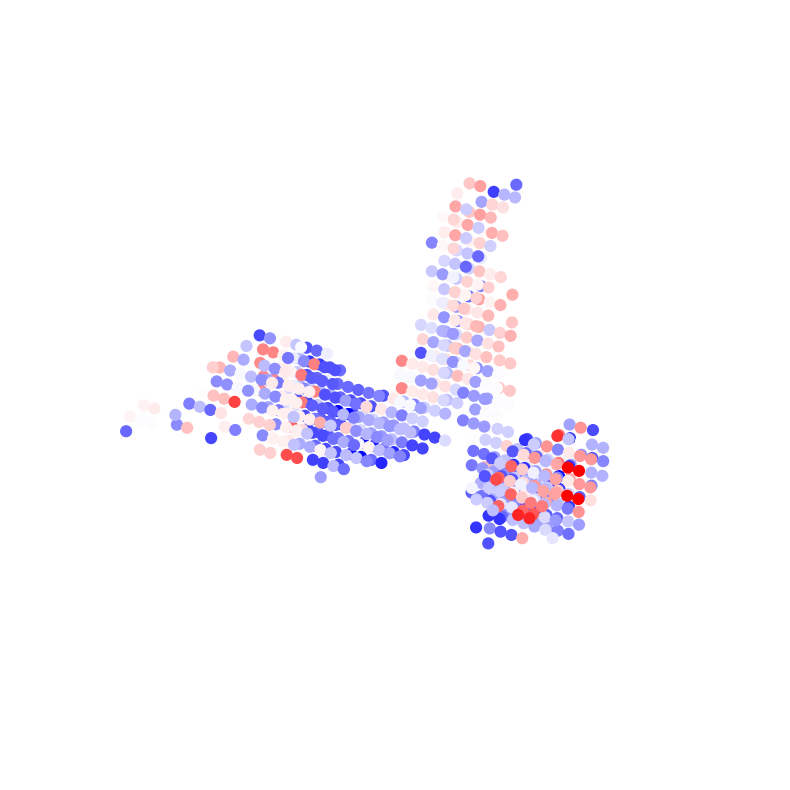

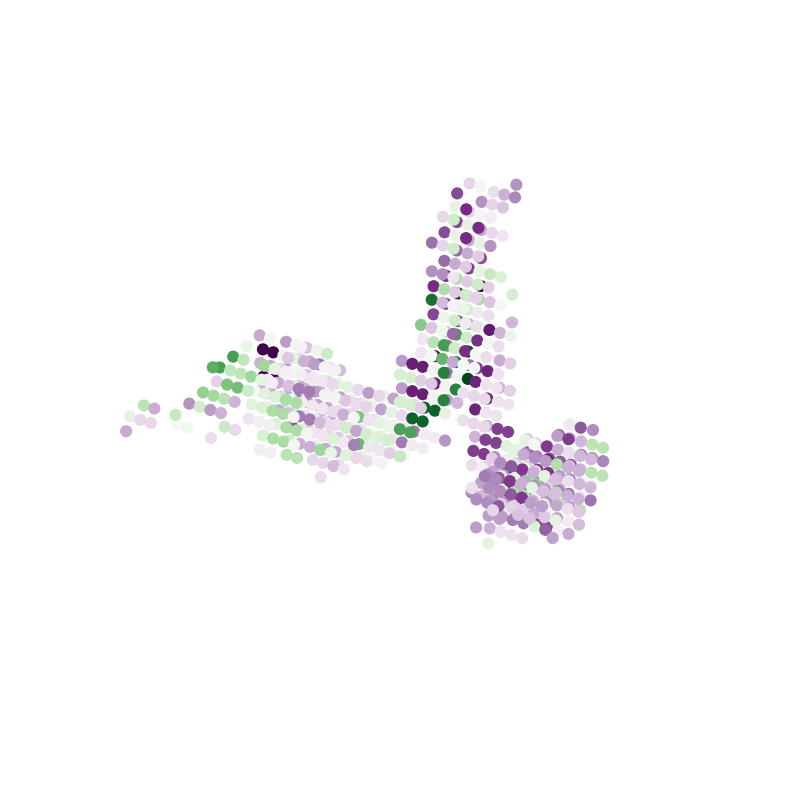

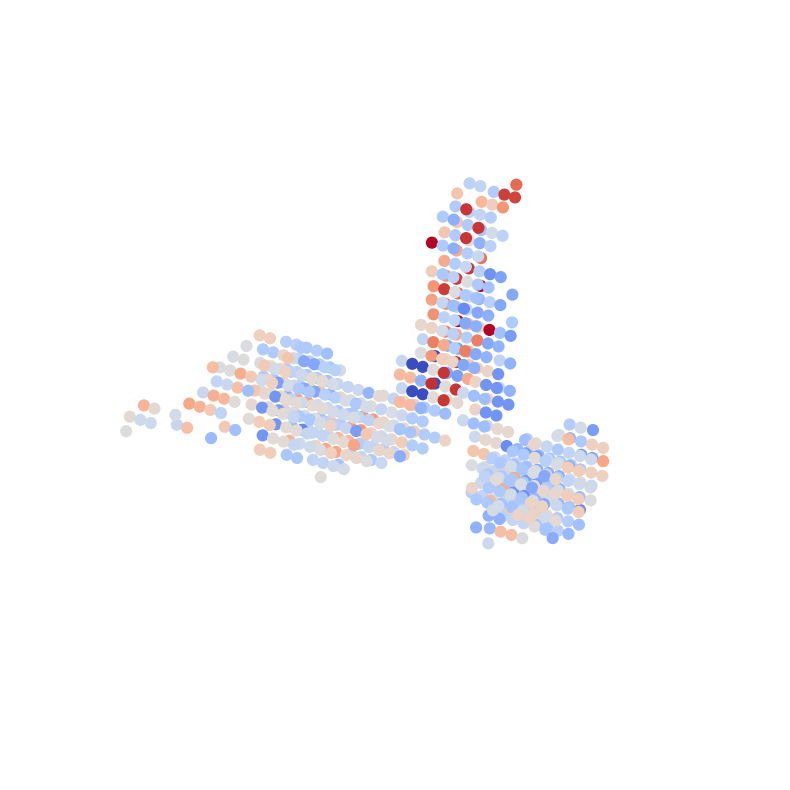

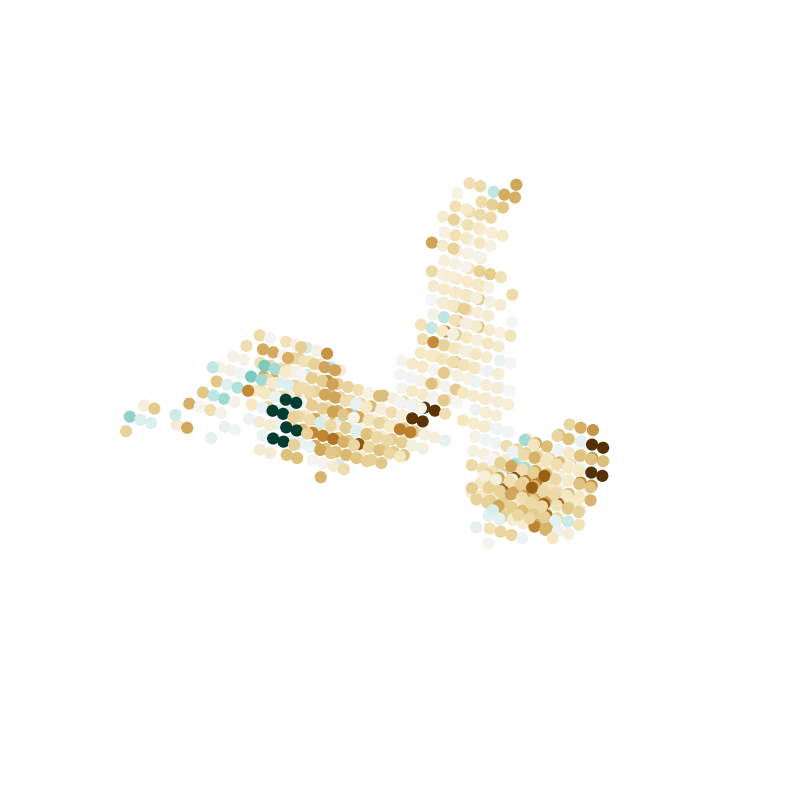

In [20]:

colors = ['seismic','seismic','PiYG','bwr','PRGn','coolwarm','BrBG']

for g in range(1,7):
    # Plot using 3D scatter plot
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(projection='3d')
    ax.dist=10
    ax.set_axis_off()
    
    ax.scatter(
        G_idx[g][:,0],
        G_idx[g][:,1],
        G_idx[g][:,2],
        s=60, alpha=1,
        cmap=colors[g], vmin=G_values[g].min(), vmax=G_values[g].max(), 
        c=G_values[g]
    )
    # Add legend    
    #norm = matplotlib.colors.Normalize(G_values[g].min(), G_values[g].max())
    #cb_ax = fig.add_axes([0.25, 0.25, 0.5, 0.03]) # start x, start y, length x, height y
    #cb = fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=colors[g]), 
    #                  ticks=[G_values[g].min(), G_values[g].max()], cax=cb_ax, orientation='horizontal')
    #cb.set_label(f"Gradient {g}", fontsize=18, labelpad=-10, weight=600)
    #cb.ax.set_xticklabels(['−','+'], fontsize=20, weight=600) 
    
    #plt.savefig(fig_path + f'Diff_Gradient_{g}_scatterplot.png', dpi=300, bbox_inches='tight', transparent=True)
    plt.show()